# 글로벌 코로나19 현황

## Data  
- 출처: https://github.com/owid/covid-19-data/tree/master/public/data  
- 기간: 2020-02-24 ~ 2021-09-09

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font',family='Batang')

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [2]:
df =pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.025,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115670 entries, 0 to 115669
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   iso_code                               115670 non-null  object        
 1   continent                              110371 non-null  object        
 2   location                               115670 non-null  object        
 3   date                                   115670 non-null  datetime64[ns]
 4   total_cases                            110065 non-null  float64       
 5   new_cases                              110062 non-null  float64       
 6   new_cases_smoothed                     109047 non-null  float64       
 7   total_deaths                           99447 non-null   float64       
 8   new_deaths                             99602 non-null   float64       
 9   new_deaths_smoothed                    109047 no

In [5]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,1.100650e+05,110062.000000,109047.000000,9.944700e+04,99602.000000,109047.000000,109484.000000,109481.000000,108471.000000,98879.000000,99034.000000,108471.000000,93138.000000,12616.000000,12616.000000,15083.000000,15083.000000,1142.000000,1142.000000,2026.000000,2026.000000,5.004300e+04,4.980600e+04,49806.000000,50043.000000,5.903800e+04,59038.000000,55804.000000,55186.000000,2.480200e+04,2.376800e+04,2.080700e+04,1.686000e+03,2.053200e+04,4.428600e+04,24802.000000,23768.000000,20807.000000,1686.000000,44286.000000,95390.000000,1.148750e+05,106963.000000,102310.000000,101170.000000,101748.000000,102862.000000,69120.000000,102609.000000,105676.000000,80145.000000,78979.000000,51546.000000,93330.000000,109720.000000,102707.00000,4003.000000
mean,1.334979e+06,6409.011166,6418.384152,3.440898e+04,146.084075,132.666494,16447.613909,81.008349,80.932809,349.347060,1.538259,1.393677,1.009759,968.341709,23.322330,4251.118146,151.031979,226.963784,17.455536,3109.237691,92.719219,5.313125e+04,9.904711e+06,410.277784,2.367342,5.009210e+04,2.259543,0.087102,163.340228,5.850657e+07,3.108472e+07,1.829080e+07,1.030370e+06,8.180028e+05,3.872407e+05,39.007188,23.761624,17.453113,1.255718,3512.066183,57.445927,1.231984e+08,394.682696,30.531664,8.769654,5.549615,19261.133493,13.461008,259.082524,7.997213,10.592077,32.730056,50.760706,3.024618,73.257722,0.72671,18.064269
std,8.979292e+06,39284.608024,38819.550840,2.052355e+05,796.856693,744.150690,28585.738216,188.699515,160.656963,602.819585,3.937204,2.975807,0.349640,2881.195992,25.666966,11692.032933,198.728341,514.556685,32.343901,10436.886664,192.136178,1.878503e+05,4.191996e+07,994.479337,6.656840,1.700017e+05,5.508365,0.096780,864.673438,3.282144e+08,1.774231e+08,1.060514e+08,2.685818e+06,3.798540e+06,2.558810e+06,42.077191,23.159020,20.001745,3.672414,4449.278826,20.827394,6.787676e+08,1837.939928,9.126336,6.197337,4.226431,20046.165053,19.976693,119.263152,4.252641,10.499950,13.499021,31.754413,2.454160,7.544816,0.15026,35.095659
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,-75.911000,-10.844000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.39400,-95.590000
25%,1.800000e+03,3.000000,8.714000,6.300000e+01,0.000000,0.000000,317.484000,0.271000,1.474000,9.618000,0.000000,0.000000,0.840000,29.000000,3.860500,104.000000,20.269000,5.987250,1.505000,38.000000,8.590000,1.948

## Data Variables

### Confirmed cases  
- total_cases: COVID-19 누적 확진자 수 
- new_cases: COVID-19 신규 확진자 수 
- new_cases_smoothed: COVID-19 신규 확진자 수(7일 이동평균)  
- total_cases_per_million: 인구 100만 명당 COVID-19의 누적 확진자 수
- new_cases_per_million: 인구 100만 명당 COVID-19의 신규 확진자 수  
- new_cases_smoothed_per_million: 인구 100만 명당 COVID-19의 신규 확진자 수(7일 이동평균)

### Confirmed deaths
-  total_deaths: COVID-19 누적 사망자 수 
-  new_deaths:  COVID-19 신규 사망자 수 
-  new_deaths_smoothed: COVID-19 신규 사망자 수(7일 이동평균) 
-  total_deaths_per_million: 인구 100만 명당 COVID-19의 누적 사망자 수
-  new_deaths_per_million: 인구 100만 명당 COVID-19의 신규 사망자 수  
-  new_deaths_smoothed_per_million: 인구 100만 명당 COVID-19의 신규 사망자 수(7일 이동평균)

### Hospital(입원) & ICU(중환자실)

- icu_patients: 특정 요일 중환자실(ICU)의 COVID-19 환자 수
- icu_patients_per_million
- hosp_patients: 지정된 날짜에 병원에 입원한 COVID-19 환자 수
- hosp_patients_per_million
- weekly_icu_admissions: 주어진 주에 중환자실(ICU)에 새로 입원한 COVID-19 환자 수
- weekly_icu_admissions_per_million
- weekly_hosp_admissions: 주어진 주에 새로 병원에 입원한 COVID-19 환자 수
- weekly_hosp_admissions_per_million

### Policy responses

- stringency_index: 정부 대응 스트링런시 지수: 휴교, 직장 휴교, 여행 금지 등 9가지 대응 지표를 기반으로 한 종합 척도로 0에서 100까지의 값으로 재조정 (100 = 가장 엄격한 대응)

### Reproduction rate
- reproduction_rate: 코로나19의 실효 번식률(R) 실시간 추정. 참조 https://github.com/crondonm/TrackingR/tree/main/Estimates-Database

### Tests & positivity
- total_tests: COVID-19에 대한 총 검사  
- new_tests: COVID-19에 대한 새로운 테스트(연속된 날짜에 대해서만 계산)  
- total_tests_per_thousand: 1,000명당 총 코로나19 검사  
- new_tests_per_thousand:	1,000명당 코로나19 신규 검사  
- new_tests_smoothed: COVID-19에 대한 새로운 테스트(7일 완화). 매일 테스트 데이터를 보고하지 않는 국가의 경우 데이터가 보고되지 않은 기간 동안 테스트가 매일 동일하게 변경되었다고 가정합니다. 이것은 완전한 일련의 일일 수치를 생성한 다음 롤링 7일 기간 동안 평균을 냅니다.  
- new_tests_smoothed_per_thousand: 1,000명당 COVID-19에 대한 새로운 테스트(7일 완화)  
- positive_rate: 롤링 7일 평균으로 제공되는 COVID-19 테스트의 양성 비율(tests_per_case의 역수)  
- tests_per_case: 7일 동안의 평균으로 제공되는 COVID-19의 새로운 확인된 사례당 수행된 테스트(이는 positive_rate의 역수임)  
- tests_units: 테스트 데이터를 보고하기 위해 위치에서 사용하는 단위

### Vaccinations

- total_vaccinations: 총 코로나19 예방접종 접종 횟수  
- people_vaccinated: 최소 1회 백신 접종을 받은 총 사람 수  
- people_fully_vaccinated: 예방 접종 프로토콜에 명시된 모든 용량을 받은 총 사람 수  
- total_boosters: 총 코로나19 예방접종 부스터 접종 횟수(예방접종 프로토콜에 명시된 횟수를 초과하여 접종한 접종량)  
- new_vaccinations:	신규 코로나19 예방접종 접종량(연속 일수만 계산)  
- new_vaccinations_smoothed: 새로운 COVID-19 예방 접종 접종이 투여되었습니다(7일 평활화). 매일 백신 접종 데이터를 보고하지 않는 국가의 경우 데이터가 보고되지 않은 기간 동안 백신 접종이 매일 동일하게 변경되었다고 가정합니다. 이것은 완전한 일련의 일일 수치를 생성한 다음 롤링 7일 기간 동안 평균을 냅니다.  
- total_vaccinations_per_hundred: 전체 인구 100명당 코로나19 예방접종 총 접종 횟수  
- people_vaccinated_per_hundred: 전체 인구 100명당 1회 이상 백신 접종을 받은 사람의 총 수  
- people_fully_vaccinated_per_hundred: 전체 인구 100명당 예방접종 프로토콜에서 규정한 모든 용량을 접종한 총 인구 수
- total_boosters_per_hundred: 전체 인구 100명당 투여된 코로나19 예방접종 총량  
- new_vaccinations_smoothed_per_million: 전체 인구 1,000,000명당 새로운 COVID-19 백신 접종(7일 평활화) 투여

### Others  
- iso_code:	ISO 3166-1 alpha-3 – 3자리 국가 코드  
- continent: 지리적 위치의 대륙  
- location:	지리적 위치  
- date:	관찰 날짜  
- population: 2020년 인구  
- population_density: 평방 킬로미터로 측정한 토지 면적으로 나눈 사람 수(가장 최근 연도)  
- median_age: 인구의 중위 연령, 2020년 UN 전망  
- aged_65_older: 65세 이상 인구 비율(가장 최근 연도)  
- aged_70_older: 2015년 기준 70세 이상 인구 비율  
- gdp_per_capita: 구매력 평가 기준 국내 총생산(2011년 국제 달러 고정), 가장 최근 연도 사용 가능  
- extreme_poverty: 극빈층 인구 비율, 2010년 이후 가장 최근 연도  
- cardiovasc_death_rate: 2017년 심혈관 질환 사망률(인구 10만 명당 연간 사망자 수)  
- diabetes_prevalence: 2017년 당뇨병 유병률(20~79세 인구의 %)  
- female_smokers: 흡연하는 여성의 비율(가장 최근 연도)  
- male_smokers: 흡연하는 남성의 비율(가장 최근 연도)  
- handwashing_facilities: 구내에 기본적인 손 씻기 시설을 갖춘 인구 비율(가장 최근 연도)  
- hospital_beds_per_thousand: 인구 1,000명당 병상, 2010년 이후 이용 가능한 가장 최근 연도  
- life_expectancy: 2019년 출생 시 기대 수명  
- human_development_index: 인간 발달의 세 가지 기본 차원(장수하고 건강한 삶, 지식 및 적절한 생활 수준)에서 평균 성취도를 측정하는 종합 지수. http://hdr.undp.org/en/indicators/137506 에서 가져온 2019년 값  
- excess_mortality:	모든 연령대에 대한 초과 사망률 P-점수; P 점수의 정의와 계산 방법 은 https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality 를 참조 하십시오.

# Visualization

In [6]:
print('나라 수:', len(df['location'].unique()))

나라 수: 233


In [7]:
print('대륙 수:', len(df['continent'].unique()))
print('이름:', df['continent'].unique())

대륙 수: 7
이름: ['Asia' nan 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


In [8]:
# np.where(condition, T, F) 값 변경
#df['continent'] = np.where(pd.notnull(df['continent']) == True, df['continent'], df['location'])

In [9]:
for i in df['continent'].unique():
    count = len(df[df['continent'] == i]['location'].unique())
    print(i,'의 나라 수:', count)

Asia 의 나라 수: 50
nan 의 나라 수: 0
Europe 의 나라 수: 51
Africa 의 나라 수: 55
North America 의 나라 수: 34
South America 의 나라 수: 13
Oceania 의 나라 수: 21


In [20]:
# 대륙별/전체 피처로 추가되어 있다.
print('Null값의 나라:', df[df['continent'].isnull()]['location'].unique())

Null값의 나라: ['Africa' 'Asia' 'Europe' 'European Union' 'International' 'North America'
 'Oceania' 'South America' 'World']


## World

### confirmed cases/deaths/Hospital & ICU/Vaccinations

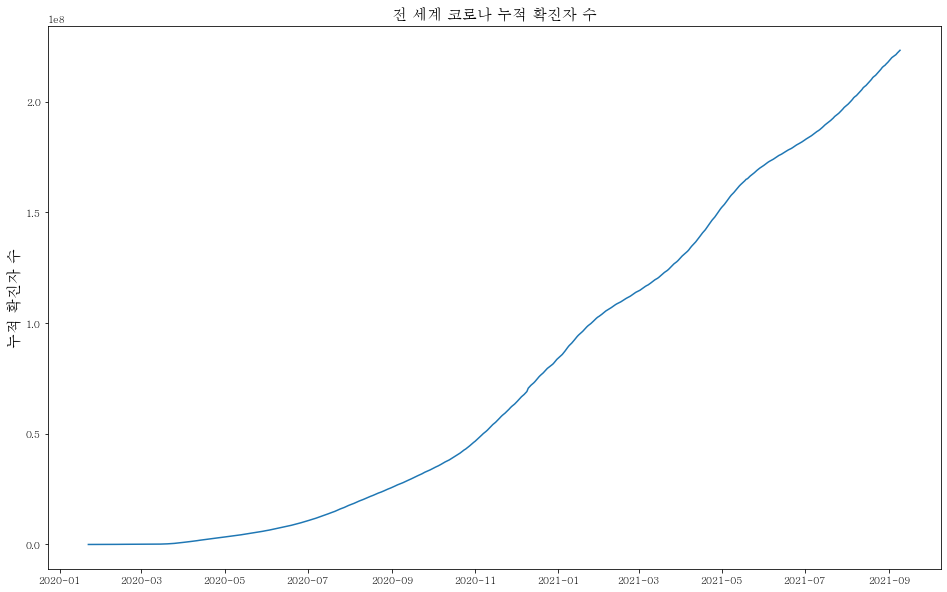

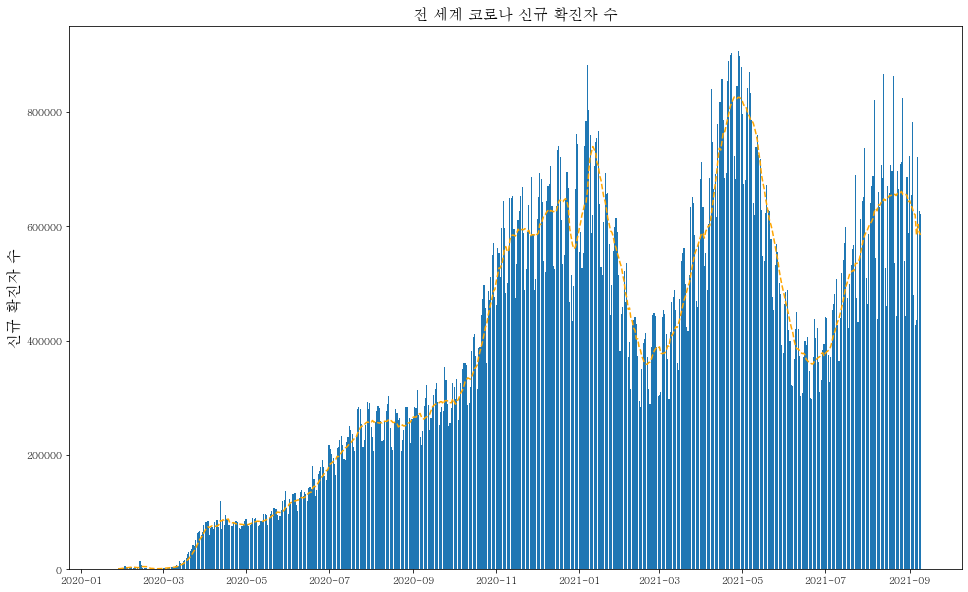

In [11]:
df_world = df[df['location'] == 'World']

plt.figure(figsize=(16, 10))
plt.plot(df_world.date, df_world.total_cases)
plt.title('전 세계 코로나 누적 확진자 수', size=15)
plt.ylabel('누적 확진자 수', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(df_world.date, df_world.new_cases)
plt.plot(df_world.date, df_world.new_cases_smoothed , color='orange', linestyle='dashed')
plt.title('전 세계 코로나 신규 확진자 수', size=15)
plt.ylabel('신규 확진자 수', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

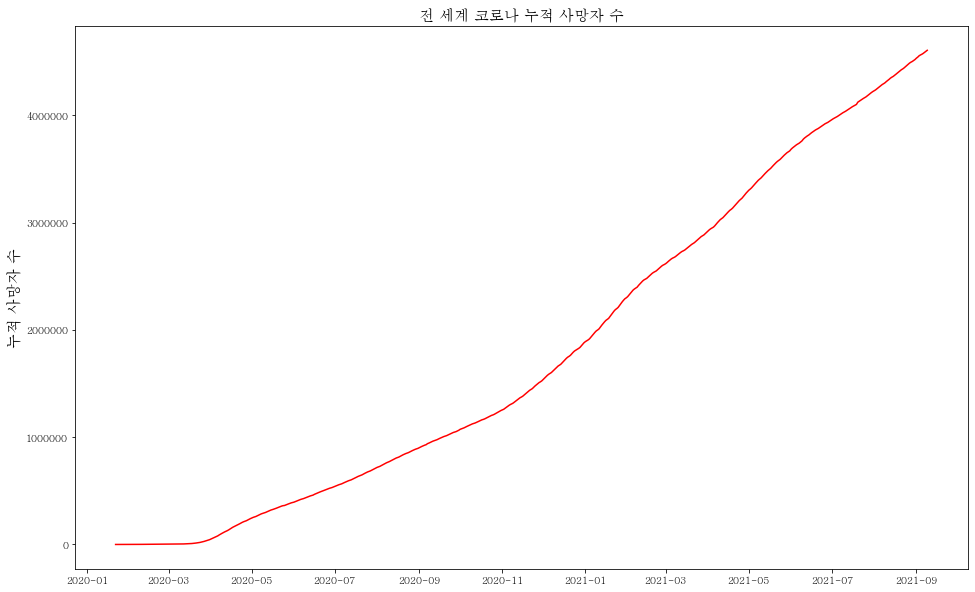

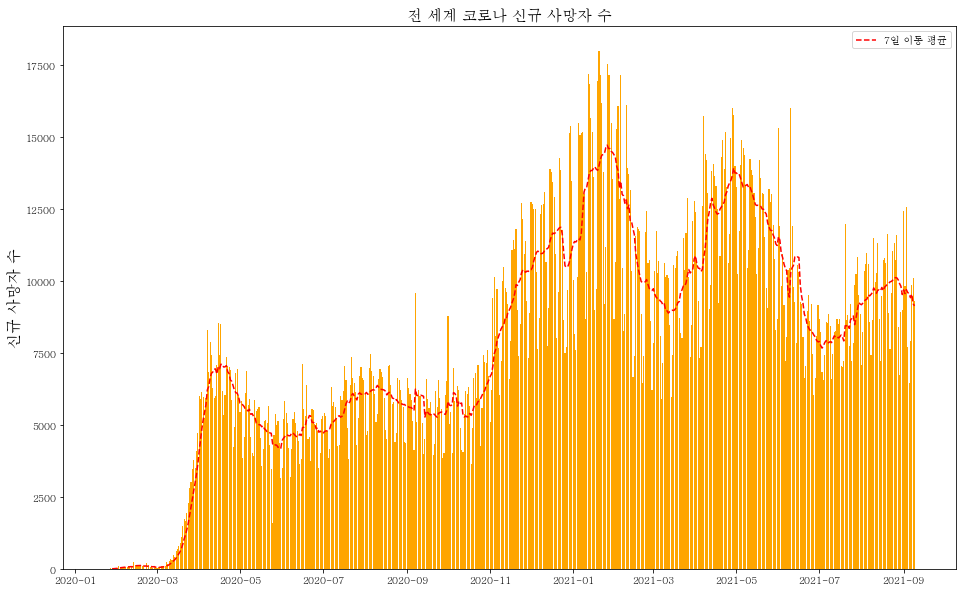

In [12]:
plt.figure(figsize=(16, 10))
plt.plot(df_world.date, df_world.total_deaths, color = 'red')
plt.title('전 세계 코로나 누적 사망자 수', size=15)
plt.ylabel('누적 사망자 수', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(df_world.date, df_world.new_deaths, color='orange')
plt.plot(df_world.date, df_world.new_deaths_smoothed , color='red', linestyle='dashed',label='7일 이동 평균')
plt.title('전 세계 코로나 신규 사망자 수', size=15)
plt.ylabel('신규 사망자 수', size=15)
plt.legend()
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

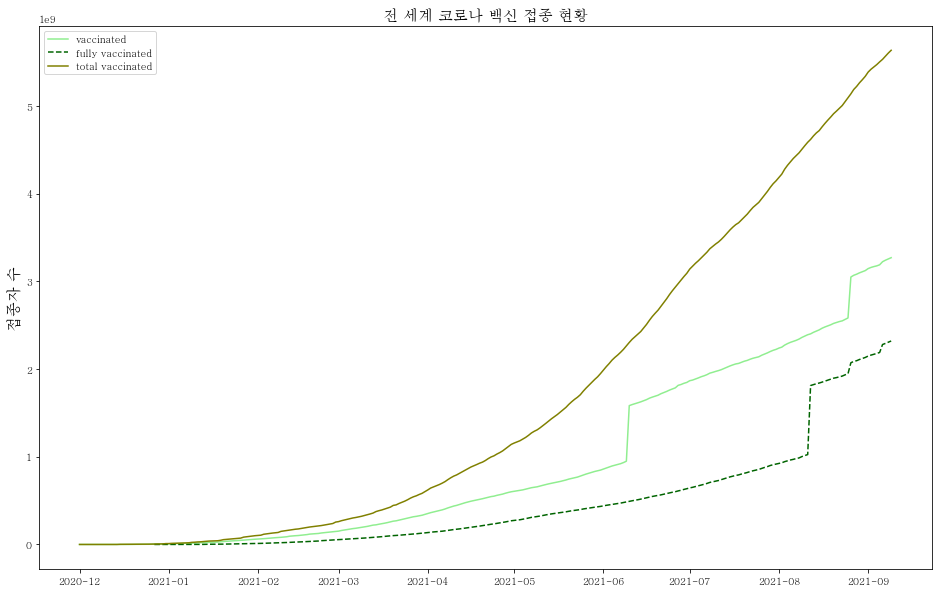

In [13]:
plt.figure(figsize=(16, 10))
plt.plot(df_world.date, df_world.people_vaccinated, color = 'lightgreen', label = 'vaccinated')
plt.plot(df_world.date, df_world.people_fully_vaccinated, color = 'darkgreen',linestyle='dashed', label = 'fully vaccinated')
plt.plot(df_world.date, df_world.total_vaccinations, color = 'olive',label = 'total vaccinated')
plt.title('전 세계 코로나 백신 접종 현황', size=15)
plt.ylabel('접종자 수', size=15)
plt.legend()
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

## Continent

In [14]:
df_continent = df[df['continent'].isnull()]

In [15]:
latest = df_continent[df_continent['date'] == '2021-09-09'].iloc[:-1,:]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
1138,OWID_AFR,NaN,Africa,2021-09-09,7996440.0,20208.0,21043.857,201540.0,475.0,539.571,5822.001,14.713,15.321,146.736,0.346,0.393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.177835e+08,7.660918e+07,4.503912e+07,NaN,1274177.0,1629426.0,8.58,5.58,3.28,NaN,1186.0,NaN,1.373486e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6056,OWID_ASI,NaN,Asia,2021-09-09,72180858.0,221641.0,223856.429,1072332.0,3089.0,3705.143,15424.379,47.363,47.836,229.147,0.660,0.792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.765904e+09,2.194290e+09,1.489605e+09,13821768.0,25598677.0,23166056.0,80.47,46.89,31.83,0.30,4950.0,NaN,4.679661e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35372,OWID_EUR,NaN,Europe,2021-09-09,56901049.0,152432.0,126692.429,1191393.0,1740.0,1612.143,76096.619,203.855,169.432,1593.309,2.327,2.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.637244e+08,4.101053e+08,3.706879e+08,1296282.0,1405078.0,1930060.0,102.14,54.85,49.57,0.17,2581.0,NaN,7.477474e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35968,OWID_EUN,NaN,European Union,2021-09-09,36925551.0,76296.0,52973.714,759527.0,583.0,513.571,82572.414,170.612,118.459,1698.444,1.304,1.148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.427082e+08,2.928669e+08,2.674487e+08,970450.0,714390.0,1174915.0,121.36,65.49,59.81,0.22,2627.0,NaN,4.471899e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49564,OWID_INT,NaN,International,2021-09-09,721.0,0.0,0.000,15.0,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77061,OWID_NAM,NaN,North America,2021-09-09,48807928.0,182060.0,184217.143,1000502.0,2909.0,2490.429,81812.704,305.172,308.788,1677.059,4.876,4.175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.769517e+08,3.269235e+08,2.603195e+08,771287.0,962741.0,1712884.0,96.71,54.80,43.64,0.13,2871.0,NaN,5.965813e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78994,OWID_OCE,NaN,Oceania,2021-09-09,140726.0,2395.0,1938.571,1831.0,17.0,10.714,3256.042,55.414,44.854,42.365,0.393,0.248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.784933e+07,1.752019e+07,1.032916e+07,NaN,442076.0,338591.0,64.44,40.54,23.90,NaN,7834.0,NaN,4.321995e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96727,OWID_SAM,NaN,South America,2021-09-09,37151904.0,41952.0,27120.714,1138108.0,1097.0,784.000,85552.186,96.606,62.453,2620.798,2.526,1.805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

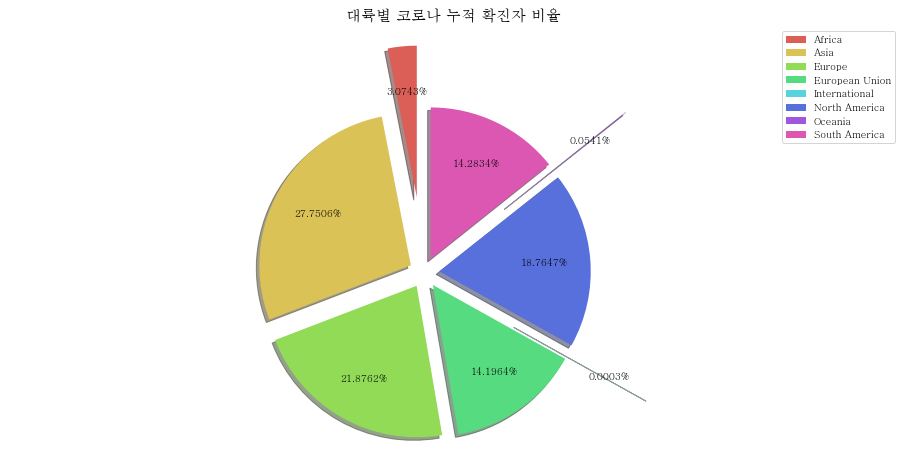

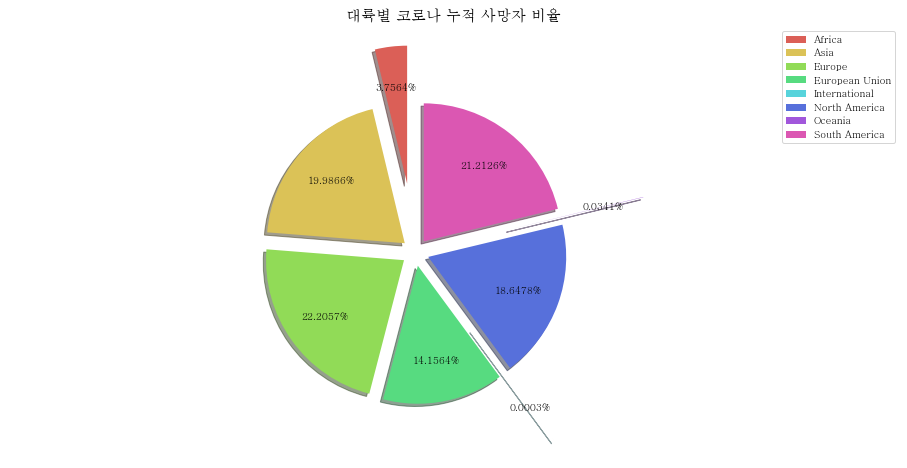

In [21]:
colors = sns.color_palette('hls',len(latest['location']))

plt.pie(latest['total_cases'].values, 
        autopct='%1.4f%%',
        startangle=90,
        pctdistance=0.7,
        explode = [0.5, 0.1, 0.1, 0.1, 0.7, 0.1, 0.7, 0.1],
        textprops={'fontsize': 10},
        colors = colors,
        shadow=True)

plt.title('대륙별 코로나 누적 확진자 비율', size=15)
plt.axis('equal')
plt.legend(latest['location'].values)    
plt.show()


plt.pie(latest['total_deaths'].values, 
        autopct='%1.4f%%',
        startangle=90,
        pctdistance=0.7,
        explode = [0.5, 0.1, 0.1, 0.1, 0.7, 0.1, 0.7, 0.1],
        textprops={'fontsize': 10},
        colors = colors,
        shadow=True)

plt.title('대륙별 코로나 누적 사망자 비율', size=15)
plt.axis('equal')
plt.legend(latest['location'].values)    
plt.show()

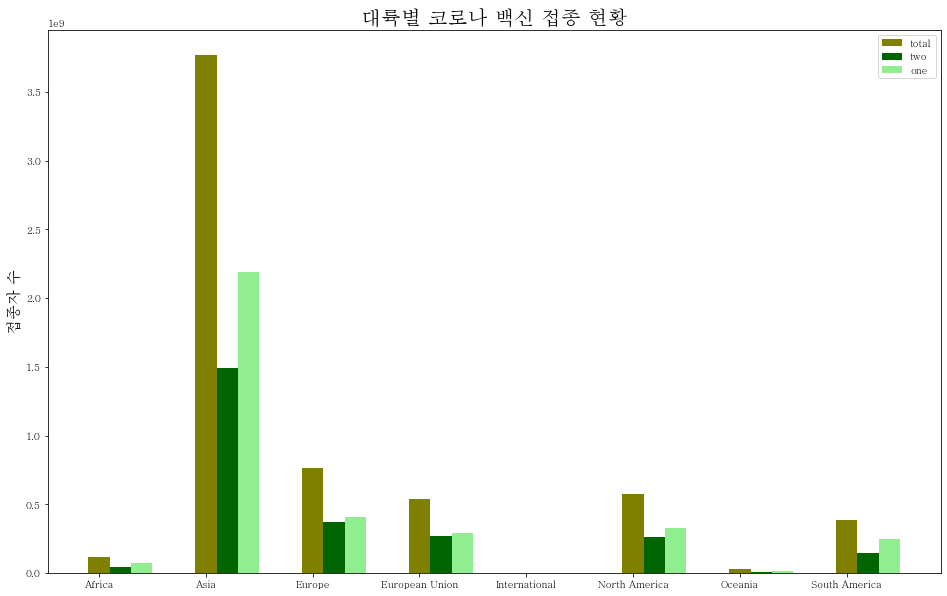

In [18]:
bar_width = 0.2
x = np.arange(len(latest.location))

plt.figure(figsize=(16, 10))
p1 = plt.bar(x, latest.total_vaccinations, bar_width,label='total', color='olive')
p2 = plt.bar(x +  bar_width, latest.people_fully_vaccinated, bar_width,label='two', color='darkgreen')
p3 = plt.bar(x +  2*bar_width, latest.people_vaccinated, bar_width,label='one', color='lightgreen')
plt.title('대륙별 코로나 백신 접종 현황', size=20)
plt.ylabel('접종자 수', size=15)
plt.xticks(x,latest.location,size=10)
plt.yticks(size=10)
plt.legend(fontsize=10)

plt.show()

df_continent = df[df['continent'].isnull()]

for group_name in df_continent['location'].unique():
    long_df_sub = df_continent[df_continent['location'] == group_name]
    plt.plot(long_df_sub.date, long_df_sub.total_deaths)

plt.legend(df_continent['location'].unique(), fontsize=12, loc='best')
plt.show()